# Income Classification

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

**Uploading the data**

In [2]:
indf= pd.read_csv('DS2_C6_S1_Income_Data_Challenge.csv')

In [3]:
indf

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [4]:
indf.shape

(32561, 14)

In [5]:
indf['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [6]:
indf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
# chkng for null
indf.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [8]:
# no null values

In [9]:
## cheking for duplicates 
indf.duplicated().sum()

24

In [10]:
#24 duplicates found now dropping them 
indf.drop_duplicates(keep='first',inplace=True)

In [11]:
indf.duplicated().sum()

0

In [12]:
# checking for outliers for the numerical columns

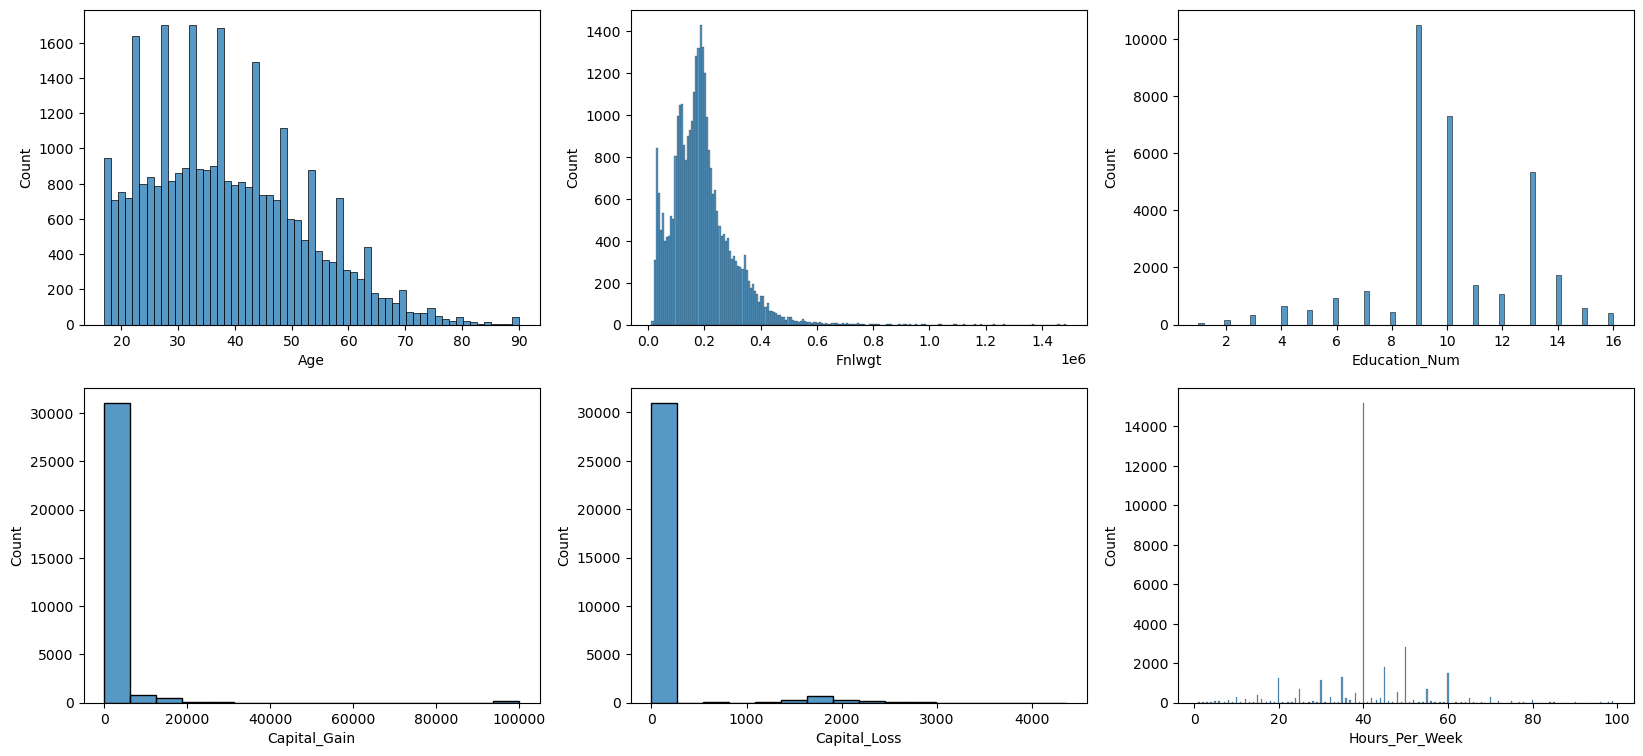

In [13]:
num_col = indf.select_dtypes(["int64"])

fig,axs=plt.subplots(2,3,figsize=(20,9))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,data=indf,ax=axs[count])
    count+=1

<AxesSubplot:xlabel='Fnlwgt'>

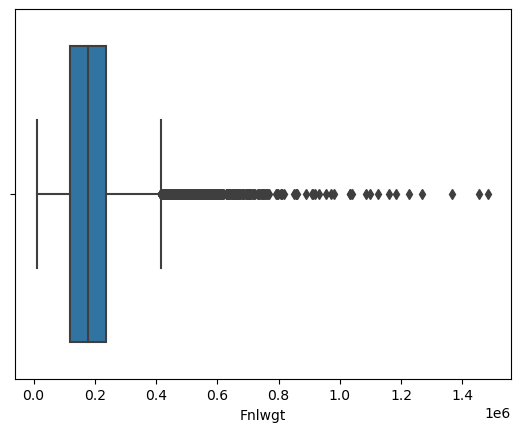

In [14]:
sns.boxplot('Fnlwgt',data=indf)

In [15]:
iqr=indf['Fnlwgt'].quantile(0.75)-indf['Fnlwgt'].quantile(0.25)
lf=indf['Fnlwgt'].quantile(0.25)-1.5*iqr
uf=indf['Fnlwgt'].quantile(0.75)+1.5*iqr
indf=indf[(indf['Fnlwgt']>lf) & (indf['Fnlwgt']<uf)]  

<AxesSubplot:xlabel='Fnlwgt'>

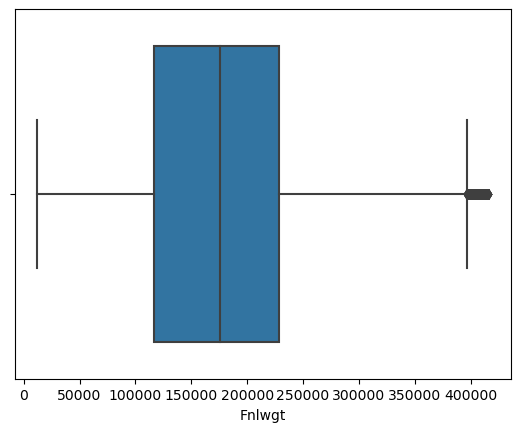

In [16]:
sns.boxplot('Fnlwgt',data=indf)

<AxesSubplot:xlabel='Capital_Loss'>

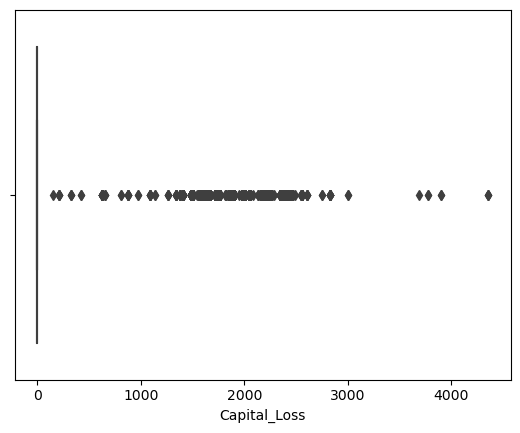

In [17]:
sns.boxplot('Capital_Loss',data=indf)

<AxesSubplot:>

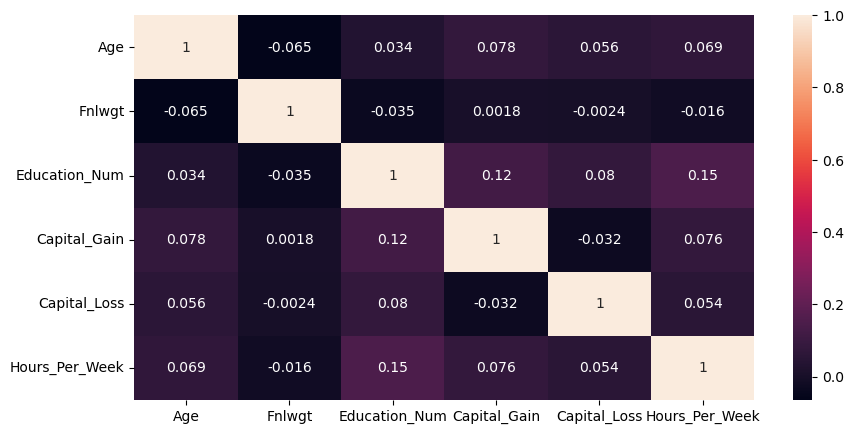

In [18]:
corr_mat = indf.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_mat,annot=True)

<AxesSubplot:xlabel='Income_Bracket', ylabel='count'>

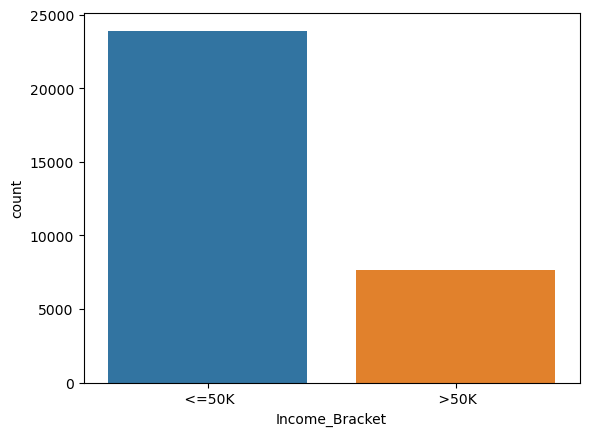

In [19]:
sns.countplot(x='Income_Bracket',data=indf)

The no. of people are more who have income less then 50k.

<AxesSubplot:xlabel='count', ylabel='WorkClass'>

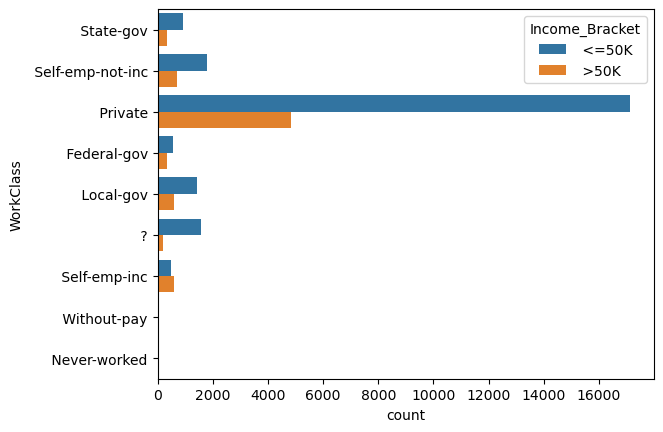

In [20]:
sns.countplot(y='WorkClass',hue='Income_Bracket',data=indf)

Most of the people have a WorkClass is in Private and have incom less than 50k.

<AxesSubplot:xlabel='count', ylabel='Education_Num'>

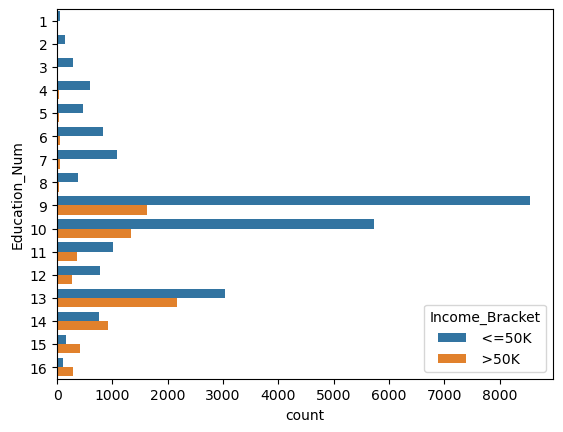

In [21]:
sns.countplot(y='Education_Num',hue='Income_Bracket',data=indf)

Most of the people belong to Education Num of 9 and 10 who have income less than 50k.

<AxesSubplot:xlabel='Education_Num', ylabel='Hours_Per_Week'>

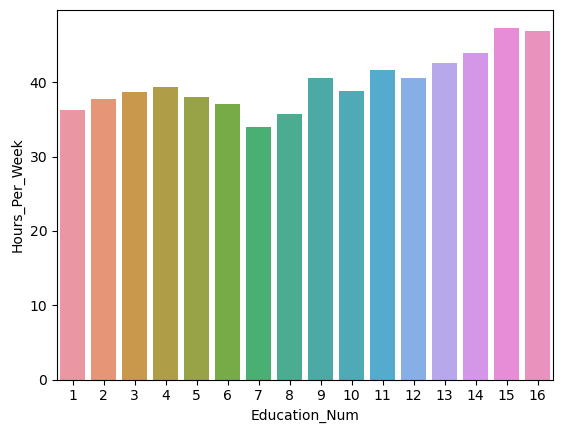

In [23]:
sns.barplot(y='Hours_Per_Week',x='Education_Num',data=indf,ci=None)

Most people who have Education Num of 16, 15, 14 who work more than 40 hours per week.

<AxesSubplot:xlabel='Education_Num', ylabel='Capital_Gain'>

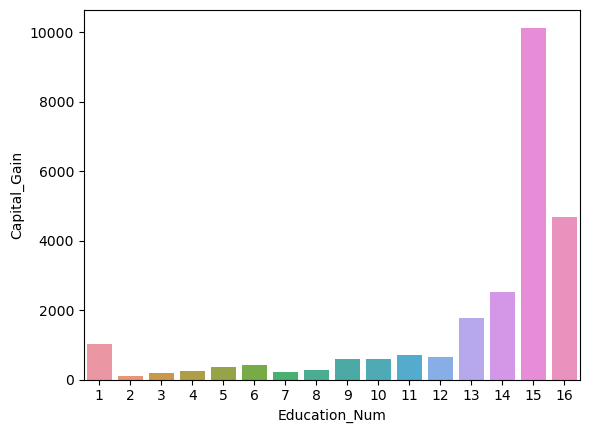

In [24]:
sns.barplot(y='Capital_Gain',x='Education_Num',data=indf,ci=None)

For the Education Num 15 the Capital Gain is the highest.

In [25]:
## changing object as category

In [26]:
cat_col = ['WorkClass','Education','Marital_Status','Occupation','Relationship','Gender','Income_Bracket']
indf[cat_col] = indf[cat_col].astype('category')

In [27]:
indf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31544 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             31544 non-null  int64   
 1   WorkClass       31544 non-null  category
 2   Fnlwgt          31544 non-null  int64   
 3   Education       31544 non-null  category
 4   Education_Num   31544 non-null  int64   
 5   Marital_Status  31544 non-null  category
 6   Occupation      31544 non-null  category
 7   Relationship    31544 non-null  category
 8   Gender          31544 non-null  category
 9   Capital_Gain    31544 non-null  int64   
 10  Capital_Loss    31544 non-null  int64   
 11  Hours_Per_Week  31544 non-null  int64   
 12  Native_Country  31544 non-null  object  
 13  Income_Bracket  31544 non-null  category
dtypes: category(7), int64(6), object(1)
memory usage: 2.1+ MB


In [28]:
# label encoding

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    indf[col] = label_encoder.fit_transform(indf[col])

In [31]:
indf

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,9,13,4,1,1,1,2174,0,40,United-States,0
1,50,6,83311,9,13,2,4,0,1,0,0,13,United-States,0
2,38,4,215646,11,9,0,6,1,1,0,0,40,United-States,0
3,53,4,234721,1,7,2,6,0,1,0,0,40,United-States,0
4,28,4,338409,9,13,2,10,5,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,0,38,United-States,0
32557,40,4,154374,11,9,2,7,0,1,0,0,40,United-States,1
32558,58,4,151910,11,9,6,1,4,0,0,0,40,United-States,0
32559,22,4,201490,11,9,4,1,3,1,0,0,20,United-States,0


In [32]:
corr_mat

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.065373,0.033610,0.077969,0.055750,0.068875
Fnlwgt,-0.065373,1.000000,-0.035396,0.001776,-0.002411,-0.016081
Education_Num,0.033610,-0.035396,1.000000,0.121319,0.080165,0.149455
Capital_Gain,0.077969,0.001776,0.121319,1.000000,-0.031883,0.076265
Capital_Loss,0.055750,-0.002411,0.080165,-0.031883,1.000000,0.054446
Hours_Per_Week,0.068875,-0.016081,0.149455,0.076265,0.054446,1.000000


In [33]:
# scaling

In [34]:
corr_ma2 =indf.corr()

<AxesSubplot:>

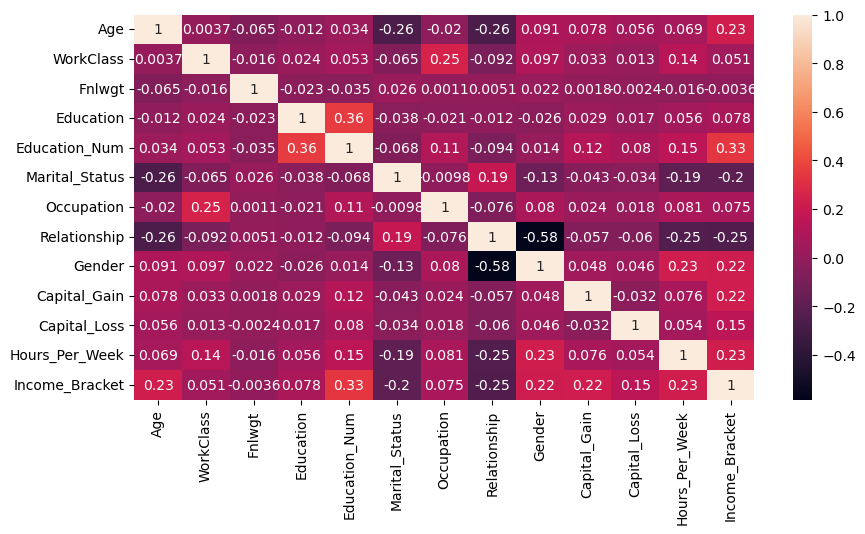

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_ma2,annot=True)

In [36]:
indf.drop(columns=['Relationship','Fnlwgt'],inplace=True)

In [37]:
indf.drop('Native_Country',axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
X=indf.drop(['Income_Bracket'],axis=1)
y=indf['Income_Bracket']

scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[ 0.02251818,  2.1481017 , -0.33923606, ...,  0.1481137 ,
        -0.2180718 , -0.03751705],
       [ 0.82802847,  1.46175356, -0.33923606, ..., -0.14620409,
        -0.2180718 , -2.21978892],
       [-0.05071002,  0.08905728,  0.17880244, ..., -0.14620409,
        -0.2180718 , -0.03751705],
       ...,
       [ 1.41385413,  0.08905728,  0.17880244, ..., -0.14620409,
        -0.2180718 , -0.03751705],
       [-1.22236134,  0.08905728,  0.17880244, ..., -0.14620409,
        -0.2180718 , -1.65401474],
       [ 0.97448488,  0.77540542,  0.17880244, ...,  1.88775659,
        -0.2180718 , -0.03751705]])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
err_rate =[]
for i in range(2,30): # k=2,3,4,..10
    model=KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    err_rate.append(np.mean(y_test!=y_pred))

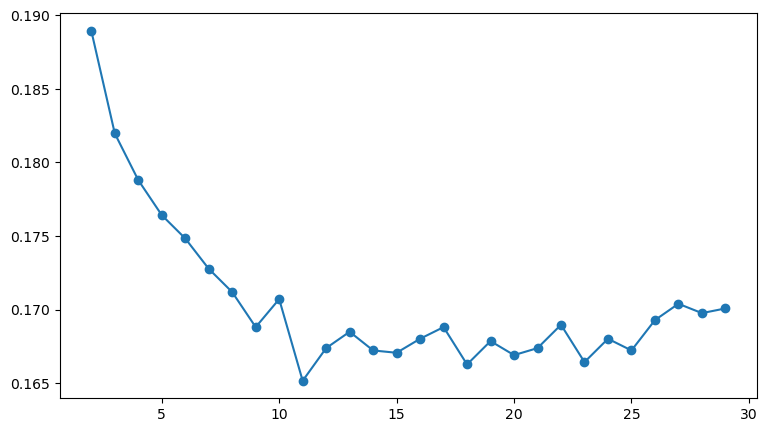

In [44]:
plt.figure(figsize=(9,5))
plt.plot(range(2,30),err_rate,marker='o')

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [56]:
# for k=26 , 27 , predictng high

In [57]:
k=17
k17model=KNeighborsClassifier(k).fit(X_train,y_train)


In [58]:
y_pred= k17model.predict(X_test)

In [59]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[4330,  410],
       [ 655,  914]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4740
           1       0.69      0.58      0.63      1569

    accuracy                           0.83      6309
   macro avg       0.78      0.75      0.76      6309
weighted avg       0.82      0.83      0.83      6309



In [62]:
print(" accuracy on train :" , k17model.score(X_train,y_train))

 accuracy on train : 0.8601149197543095


In [63]:
print("accuracy on test: ", k17model.score(X_test,y_test))

accuracy on test:  0.8311935330480267


Text(120.72222222222221, 0.5, 'predicted')

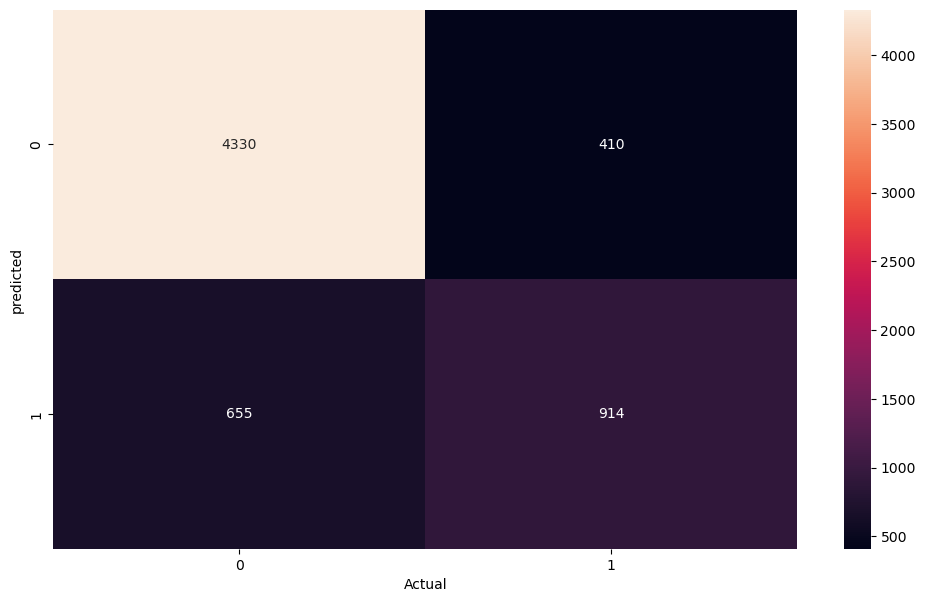

In [64]:
plt.figure(figsize=(12,7))
sns.heatmap(cm,annot=True,fmt='d') # fmt formatting
plt.xlabel("Actual")
plt.ylabel("predicted")